<a href="https://colab.research.google.com/github/daikichiba9511/study_log/blob/master/FashionMNIST_3layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow
from tensorflow import keras

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt

In [0]:
batch_size = 128
num_class = 10
epochs = 20

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
len(x_train)

60000

In [7]:
keras.backend.image_data_format()

'channels_last'

In [8]:
len(x_test)

10000

In [9]:
len(y_test)

10000

In [0]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test= x_test.reshape(x_test.shape[0],28,28,1)

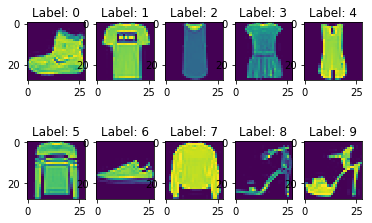

In [11]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("Label: " + str(i))
    plt.imshow(x_train[i].reshape(28,28), cmap=None)

In [12]:
y_train[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
model = keras.models.Sequential([
 
   #２次元の畳み込み３＊３のサイズの畳こみの行列が３２枚
    keras.layers.Conv2D(32,kernel_size=(3,3),
                        activation='relu',
                        input_shape=(28,28,1)),
    keras.layers.Conv2D(64,(3,3),activation='relu' ),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_class,activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 20s 327us/sample - loss: 0.4694 - acc: 0.8335
Epoch 2/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.3158 - acc: 0.8867
Epoch 3/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.2687 - acc: 0.9025
Epoch 4/10
60000/60000 [==============================] - 17s 276us/sample - loss: 0.2394 - acc: 0.9118
Epoch 5/10
60000/60000 [==============================] - 17s 276us/sample - loss: 0.2129 - acc: 0.9208
Epoch 6/10
60000/60000 [==============================] - 17s 276us/sample - loss: 0.1972 - acc: 0.9265
Epoch 7/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.1827 - acc: 0.9327
Epoch 8/10
60000/60000 [==============================] - 17s 276us/sample - loss: 0.1713 - acc: 0.9356
Epoch 9/10
60000/60000 [==============================] - 17s 276us/sample - loss: 0.1596 - acc: 0.9400
Epoch 10/10
60000/60000 [==============================] - 17s 2

In [17]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 105us/sample - loss: 0.2190 - acc: 0.9264


[0.21898677932322025, 0.9264]

In [18]:
model.predict(x_test[0:1]) # 先頭のデータを取得

array([[1.1723660e-13, 2.7807189e-13, 1.8462701e-13, 1.6830371e-13,
        1.7387823e-13, 1.3677507e-07, 4.4460831e-14, 2.1271470e-07,
        9.2648172e-12, 9.9999964e-01]], dtype=float32)

In [0]:
argmax(x_test[0:1])

NameError: name 'argmax' is not defined